In [24]:
!pip install -q mne mne-bids scikit-learn openneuro-py pandas numpy


In [ ]:
from openneuro import download

download(
    dataset="ds007020",
    target_dir="data1",
    include=["sub-PD1301", "sub-PD1311", "sub-PD1321"]
)



👋 Hello! This is openneuro-py 2025.2.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds007020 …


📁 Traversing directories for ds007020 : 35 entities [00:40,  1.17s/ entities]

📥 Retrieving up to 34 files (5 concurrent downloads). 
✅ Finished downloading ds007020.
 
🧠 Please enjoy your brains.
 


participants.tsv: 1.82kB [00:00, 8.06kB/s]
                                          
sub-PD1311_ses-01_scans.tsv: 0.00B [00:00, ?B/s]             
                                                


                                                            
                                                           

                                                            

                                                                     
                                                         

                                                                   
sub-PD1311_ses-01_task-rest_eeg.eeg: 0.00B [00:00, ?B/s]

sub-PD1311_ses-01_task-rest_eeg.eeg: 68.2kB [00:00, 190kB/s]
sub-PD1311_ses-01_task-rest_eeg.eeg: 119kB [00:00, 268kB/s] 
sub-PD1311_ses-01_task-rest_eeg.eeg: 170kB [00:00, 274kB/s]
sub-PD1311_ses-01_task-rest_eeg.eeg: 221kB [00:00, 300kB/s]
sub-PD1311_ses-01_task-rest_eeg.eeg: 306kB [00:00, 423kB/s]
sub-PD1311_ses-01_task-rest_eeg.eeg: 408kB [00:01, 292kB/s]


In [39]:
subjects = ["PD1301", "PD1311", "PD1321"]

import pandas as pd

participants = pd.read_csv(
    "data1/participants.tsv",
    sep="\t"
)

participants = participants[["participant_id", "survival_status"]]
participants


,participant_id,survival_status
0,sub-PD1001,deceased
1,sub-PD1011,deceased
2,sub-PD1021,living
3,sub-PD1031,living
4,sub-PD1041,living
...,...,...
89,sub-PD1941,living
90,sub-PD1961,living
91,sub-PD1971,living
92,sub-PD1981,living


In [29]:
label_map = {
    "living": 0,
    "deceased": 1
}

participants["label"] = participants["survival_status"].map(label_map)
participants


,participant_id,survival_status,label
0,sub-PD1001,deceased,1
1,sub-PD1011,deceased,1
2,sub-PD1021,living,0
3,sub-PD1031,living,0
4,sub-PD1041,living,0
...,...,...,...
89,sub-PD1941,living,0
90,sub-PD1961,living,0
91,sub-PD1971,living,0
92,sub-PD1981,living,0


In [30]:
import mne
import numpy as np
from mne_bids import BIDSPath, read_raw_bids
from mne.time_frequency import psd_array_welch


In [45]:
def extract_subject_features(subject):
    bids_path = BIDSPath(
        root="data1",
        subject=subject,      # PD1301
        session="01",
        task="rest",
        datatype="eeg"
    )

    raw = read_raw_bids(bids_path, verbose=False)
    raw.load_data()  # ✅ REQUIRED

    raw.pick_types(eeg=True)
    raw.filter(1., 40.)
    raw.set_eeg_reference("average")

    epochs = mne.make_fixed_length_epochs(
        raw,
        duration=2.0,
        overlap=1.0,
        preload=True
    )

    data = epochs.get_data()
    sfreq = raw.info["sfreq"]

    bands = {
        "theta": (4, 8),
        "alpha": (8, 13),
        "beta":  (13, 30)
    }

    features = []

    for fmin, fmax in bands.values():
        psd, _ = psd_array_welch(
            data,
            sfreq=sfreq,
            fmin=fmin,
            fmax=fmax,
            verbose=False
        )
        band_power = psd.mean(axis=-1)           # epochs × channels
        features.append(band_power.mean(axis=0))  # average epochs

    return np.concatenate(features)


In [53]:
import pandas as pd

participants = pd.read_csv(
    "data1/participants.tsv",
    sep="\t"
)

label_map = {"living": 0, "deceased": 1}

participants["label"] = participants["survival_status"].map(label_map)

label_dict = dict(
    zip(
        participants["participant_id"].str.replace("sub-", ""),
        participants["label"]
    )
)

label_dict


{'PD1001': 1,
 'PD1011': 1,
 'PD1021': 0,
 'PD1031': 0,
 'PD1041': 0,
 'PD1051': 1,
 'PD1061': 1,
 'PD1071': 1,
 'PD1081': 0,
 'PD1091': 1,
 'PD1101': 1,
 'PD1111': 0,
 'PD1121': 1,
 'PD1131': 0,
 'PD1141': 1,
 'PD1151': 0,
 'PD1161': 0,
 'PD1171': 0,
 'PD1181': 1,
 'PD1191': 0,
 'PD1201': 0,
 'PD1211': 1,
 'PD1221': 1,
 'PD1231': 0,
 'PD1241': 1,
 'PD1261': 0,
 'PD1271': 0,
 'PD1281': 0,
 'PD1291': 0,
 'PD1301': 1,
 'PD1311': 0,
 'PD1321': 1,
 'PD1331': 0,
 'PD1341': 0,
 'PD1351': 0,
 'PD1361': 1,
 'PD1371': 0,
 'PD1381': 0,
 'PD1391': 0,
 'PD1411': 0,
 'PD1421': 1,
 'PD1431': 0,
 'PD1441': 0,
 'PD1451': 0,
 'PD1461': 0,
 'PD1471': 0,
 'PD1481': 0,
 'PD1491': 0,
 'PD1501': 1,
 'PD1511': 0,
 'PD1521': 0,
 'PD1531': 1,
 'PD1541': 0,
 'PD1551': 0,
 'PD1571': 0,
 'PD1581': 1,
 'PD1591': 0,
 'PD1601': 0,
 'PD1611': 0,
 'PD1621': 0,
 'PD1631': 1,
 'PD1641': 0,
 'PD1651': 0,
 'PD1661': 0,
 'PD1681': 0,
 'PD1691': 0,
 'PD1701': 0,
 'PD1711': 0,
 'PD1721': 0,
 'PD1731': 0,
 'PD1741': 0,
 'PD17

In [54]:
subjects = ["PD1301", "PD1311", "PD1321"]

X, y = [], []

for subject in subjects:
    try:
        X.append(extract_subject_features(subject))
        y.append(label_dict[subject])
        print(f"Processed {subject}")
    except Exception as e:
        print(f"Skipping {subject}: {e}")

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y:", y)


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\2280277729.py:10: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_bids(bids_path, verbose=False)


Reading 0 ... 90669  =      0.000 ...   181.338 secs...


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\2280277729.py:10: RuntimeWarning: Unable to map the following column(s) to to MNE:
survival_status: deceased
  raw = read_raw_bids(bids_path, verbose=False)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Not setting metadata
180 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 180 events and 1000 original time points ...
0 bad epochs dropped
Processed PD1301


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\2280277729.py:10: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_bids(bids_path, verbose=False)


Reading 0 ... 75799  =      0.000 ...   151.598 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\2280277729.py:10: RuntimeWarning: Unable to map the following column(s) to to MNE:
survival_status: living
  raw = read_raw_bids(bids_path, verbose=False)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Not setting metadata
150 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 150 events and 1000 original time points ...
0 bad epochs dropped
Processed PD1311


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\2280277729.py:10: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_bids(bids_path, verbose=False)


Reading 0 ... 65679  =      0.000 ...   131.358 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\2280277729.py:10: RuntimeWarning: Unable to map the following column(s) to to MNE:
survival_status: deceased
  raw = read_raw_bids(bids_path, verbose=False)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Not setting metadata
130 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 130 events and 1000 original time points ...
0 bad epochs dropped
Processed PD1321
X shape: (3, 189)
y: [1 0 1]


In [60]:
print("Feature matrix shape:", X.shape)
print("Labels:", np.bincount(y))

Feature matrix shape: (3, 189)
Labels: [1 2]


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
import numpy as np

loo = LeaveOneOut()

y_true, y_pred = [], []
skipped_folds = 0

for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # 🚨 Skip fold if only one class in training
    if len(np.unique(y_train)) < 2:
        skipped_folds += 1
        continue

    clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="linear"))
    ])

    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)

    y_true.append(y_test[0])
    y_pred.append(pred[0])

print(f"Valid folds: {len(y_true)}")
print(f"Skipped folds: {skipped_folds}")

if len(y_true) > 0:
    print("LOSO Accuracy:", accuracy_score(y_true, y_pred))
else:
    print("Not enough valid folds for evaluation")


Valid folds: 2
Skipped folds: 1
LOSO Accuracy: 0.0


Correct attempt

In [ ]:
from openneuro import download

# Download the entire ds007020 dataset
download(
    dataset="ds007020",
    target_dir="data1",
    include=None  # None means all subjects
)



👋 Hello! This is openneuro-py 2025.2.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds007020 …


📁 Traversing directories for ds007020 : 945 entities [01:59,  7.91 entities/s]

📥 Retrieving up to 945 files (5 concurrent downloads). 
✅ Finished downloading ds007020.
 
🧠 Please enjoy your brains.
 


Re-downloading CHANGES: file size mismatch.: 0.00B [00:00, ?B/s]
                                                                
sub-PD1001_ses-01_space-CapTrak_coordsystem.json: 0.00B [00:00, ?B/s]         
                                                                     
sub-PD1011_ses-01_task-rest_eeg.eeg: 0.00B [00:00, ?B/s]             

sub-PD1011_ses-01_task-rest_eeg.eeg: 83.5kB [00:00, 197kB/s]




sub-PD1011_ses-01_task-rest_eeg.eeg: 271kB [00:00, 443kB/s] 

sub-PD1011_ses-01_task-rest_eeg.eeg: 475kB [00:01, 513kB/s]

sub-PD1011_ses-01_task-rest_eeg.eeg: 560kB [00:01, 490kB/s]

sub-PD1011_ses-01_task-rest_eeg.eeg: 747kB [00:01, 497kB/s]

sub-PD1011_ses-01_task-rest_eeg.eeg: 951kB [00:02, 471kB/s]


sub-PD1011_ses-01_task-rest_eeg.eeg: 1.06MB [00:02, 456kB/s]




sub-PD1011_ses-01_task-rest_eeg.eeg: 1.13MB [00:02, 432kB/s]
sub-PD1011_ses-01_task-rest_eeg.eeg: 1.18MB [00:03, 421kB/s]
sub-PD1011_ses-01_task-rest_eeg.eeg: 1.23MB [00:03, 391kB/s]
sub-PD1011_ses-01_task-rest_ee

🔄 Request timed out while downloading D:\WorkingDir\ABM-R&D\DemandForecast\Deepgramtest\test1\data1\sub-PD1981\ses-01\eeg\sub-PD1981_ses-01_task-rest_eeg.eeg, retrying in 0.5 sec …


🔄 Request timed out while downloading D:\WorkingDir\ABM-R&D\DemandForecast\Deepgramtest\test1\data1\sub-PD1991\ses-01\eeg\sub-PD1991_ses-01_task-rest_eeg.eeg, retrying in 0.5 sec …


In [88]:
import pandas as pd

participants = pd.read_csv(
    "data1/participants.tsv", sep="\t"
)

label_map = {
    "living": 0,
    "deceased": 1
}

participants["label"] = participants["survival_status"].map(label_map)
participants


,participant_id,survival_status,label
0,sub-PD1001,deceased,1
1,sub-PD1011,deceased,1
2,sub-PD1021,living,0
3,sub-PD1031,living,0
4,sub-PD1041,living,0
...,...,...,...
89,sub-PD1941,living,0
90,sub-PD1961,living,0
91,sub-PD1971,living,0
92,sub-PD1981,living,0


In [89]:
import mne
import numpy as np
from pathlib import Path

def extract_bandpower_features(raw):
    raw = raw.copy().load_data()
    raw.filter(1., 40., fir_design="firwin")
    raw.set_eeg_reference("average", projection=True)

    psds, freqs = mne.time_frequency.psd_welch(
        raw,
        fmin=1,
        fmax=40,
        n_fft=2048,
        verbose=False
    )

    bands = {
        "delta": (1, 4),
        "theta": (4, 8),
        "alpha": (8, 13),
        "beta": (13, 30),
        "gamma": (30, 40)
    }

    features = []
    for fmin, fmax in bands.values():
        idx = np.logical_and(freqs >= fmin, freqs <= fmax)
        band_power = psds[:, idx].mean(axis=1)
        features.append(band_power)

    return np.concatenate(features)


In [97]:
#subjects = ["sub-PD1301", "sub-PD1311", "sub-PD1321"]
X, y, subjects = [], [], []

base_path = Path("data1")

for _, row in participants.iterrows():
    sub = row["participant_id"]

    eeg_dir = base_path / sub / "ses-01" / "eeg"
    vhdr_files = list(eeg_dir.glob("*.vhdr"))

    if len(vhdr_files) == 0:
        print(f"Skipping {sub}: no EEG file")
        continue

    try:
        raw = mne.io.read_raw_brainvision(
            vhdr_files[0],
            preload=True,
            verbose=False
        )

        features = extract_bandpower_features(raw)

        X.append(features)
        y.append(row["label"])
        subjects.append(sub)

        print(f"Loaded {sub}")

    except Exception as e:
        print(f"Skipping {sub}: {e}")


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1001


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1011


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1021


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1031


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1041


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1051


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1061


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1071


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1081


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1091


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1101


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1111


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1121


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1131


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1141


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1151


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1161


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1171


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1181


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1191


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1201


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1211


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1221


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1231


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1241


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1261


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1271


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1281


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1291


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1301


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1311


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1321


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1331


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1341


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1351


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1361


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1371


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1381


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1391


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1411


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1421


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1431


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1441


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1451


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1461


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1471


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1481


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1491


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1501


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1511


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1521


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1531


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1541


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1551


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1571


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1581


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1591


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1601


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1611


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1621


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1631


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1641


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1651


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1661


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1681


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1691


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1701


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1711


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1721


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1731


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1741


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1751


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1761


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1771


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1781


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1791


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1801


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1811


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1821


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1831


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1841


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1851


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1861


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1881


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1891


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1901


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1911


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1921


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1931


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1941


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1961


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1971


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1981


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3775300791.py:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


Loaded sub-PD1991


In [98]:
print(subjects)

['sub-PD1001', 'sub-PD1011', 'sub-PD1021', 'sub-PD1031', 'sub-PD1041', 'sub-PD1051', 'sub-PD1061', 'sub-PD1071', 'sub-PD1081', 'sub-PD1091', 'sub-PD1101', 'sub-PD1111', 'sub-PD1121', 'sub-PD1131', 'sub-PD1141', 'sub-PD1151', 'sub-PD1161', 'sub-PD1171', 'sub-PD1181', 'sub-PD1191', 'sub-PD1201', 'sub-PD1211', 'sub-PD1221', 'sub-PD1231', 'sub-PD1241', 'sub-PD1261', 'sub-PD1271', 'sub-PD1281', 'sub-PD1291', 'sub-PD1301', 'sub-PD1311', 'sub-PD1321', 'sub-PD1331', 'sub-PD1341', 'sub-PD1351', 'sub-PD1361', 'sub-PD1371', 'sub-PD1381', 'sub-PD1391', 'sub-PD1411', 'sub-PD1421', 'sub-PD1431', 'sub-PD1441', 'sub-PD1451', 'sub-PD1461', 'sub-PD1471', 'sub-PD1481', 'sub-PD1491', 'sub-PD1501', 'sub-PD1511', 'sub-PD1521', 'sub-PD1531', 'sub-PD1541', 'sub-PD1551', 'sub-PD1571', 'sub-PD1581', 'sub-PD1591', 'sub-PD1601', 'sub-PD1611', 'sub-PD1621', 'sub-PD1631', 'sub-PD1641', 'sub-PD1651', 'sub-PD1661', 'sub-PD1681', 'sub-PD1691', 'sub-PD1701', 'sub-PD1711', 'sub-PD1721', 'sub-PD1731', 'sub-PD1741', 'sub-

In [101]:
#subjects = ["sub-PD1301", "sub-PD1311", "sub-PD1321"]
import pandas as pd

participants = pd.read_csv(
    "data1/participants.tsv",
    sep="\t"
)

label_map = {"living": 0, "deceased": 1}
participants["label"] = participants["survival_status"].map(label_map)

label_dict = dict(
    zip(participants["participant_id"], participants["label"])
)


In [92]:
import mne
import numpy as np

def extract_bandpower_features(raw):
    raw = raw.copy().load_data()
    raw.filter(1., 40., verbose=False)
    raw.set_eeg_reference("average", verbose=False)

    # Compute PSD using current MNE API
    psd = raw.compute_psd(
        fmin=1,
        fmax=40,
        method='welch',
        n_fft=2048,
        verbose=False
    )

    psds = psd.get_data()  # shape: channels × freqs
    freqs = psd.freqs

    bands = [
        (1, 4),    # delta
        (4, 8),    # theta
        (8, 13),   # alpha
        (13, 30),  # beta
        (30, 40)   # gamma
    ]

    features = []
    for fmin, fmax in bands:
        idx = (freqs >= fmin) & (freqs <= fmax)
        band_power = psds[:, idx].mean(axis=1)  # average across frequencies
        features.append(band_power)

    return np.concatenate(features)


In [100]:
from pathlib import Path

X, y, loaded_subjects = [], [], []

base_path = Path("data1")

for sub in subjects:
    vhdr_path = (
        base_path
        / sub
        / "ses-01"
        / "eeg"
        / f"{sub}_ses-01_task-rest_eeg.vhdr"
    )

    if not vhdr_path.exists():
        print(f"❌ File not found: {vhdr_path}")
        continue

    try:
        raw = mne.io.read_raw_brainvision(
            vhdr_path,
            preload=True,
            verbose=False
        )

        features = extract_bandpower_features(raw)

        X.append(features)
        y.append(label_dict[sub])
        loaded_subjects.append(sub)

        print(f"✅ Loaded {sub}")

    except Exception as e:
        print(f"❌ Error loading {sub}: {e}")


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1001


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1011


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1021


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1031


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1041


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1051


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1061


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1071


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1081


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1091


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1101


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1111


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1121


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1131


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1141


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1151


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1161


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1171


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1181


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1191


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1201


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1211


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1221


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1231


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1241


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1261


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1271


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1281


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1291


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1301


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1311


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1321


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1331


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1341


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1351


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1361


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1371


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1381


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1391


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1411


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1421


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1431


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1441


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1451


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1461


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1471


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1481


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1491


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1501


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1511


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1521


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1531


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1541


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1551


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1571


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1581


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1591


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1601


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1611


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1621


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1631


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1641


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1651


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1661


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1681


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1691


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1701


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1711


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1721


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1731


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1741


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1751


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1761


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1771


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1781


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1791


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1801


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1811


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1821


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1831


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1841


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1851


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1861


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1881


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1891


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1901


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1911


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1921


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1931


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1941


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1961


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1971


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(
C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Resp']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1981


C:\Users\abdullahbinmasood\AppData\Local\Temp\5\ipykernel_33560\3993556575.py:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(


✅ Loaded sub-PD1991


In [102]:
import numpy as np

X = np.array(X)
y = np.array(y)

print("Feature matrix shape:", X.shape)
print("Labels:", y)
print("Loaded subjects:", loaded_subjects)


Feature matrix shape: (94, 315)
Labels: [1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Loaded subjects: ['sub-PD1001', 'sub-PD1011', 'sub-PD1021', 'sub-PD1031', 'sub-PD1041', 'sub-PD1051', 'sub-PD1061', 'sub-PD1071', 'sub-PD1081', 'sub-PD1091', 'sub-PD1101', 'sub-PD1111', 'sub-PD1121', 'sub-PD1131', 'sub-PD1141', 'sub-PD1151', 'sub-PD1161', 'sub-PD1171', 'sub-PD1181', 'sub-PD1191', 'sub-PD1201', 'sub-PD1211', 'sub-PD1221', 'sub-PD1231', 'sub-PD1241', 'sub-PD1261', 'sub-PD1271', 'sub-PD1281', 'sub-PD1291', 'sub-PD1301', 'sub-PD1311', 'sub-PD1321', 'sub-PD1331', 'sub-PD1341', 'sub-PD1351', 'sub-PD1361', 'sub-PD1371', 'sub-PD1381', 'sub-PD1391', 'sub-PD1411', 'sub-PD1421', 'sub-PD1431', 'sub-PD1441', 'sub-PD1451', 'sub-PD1461', 'sub-PD1471', 'sub-PD1481', 'sub-PD1491', 'sub-PD1501', 'sub-PD1511', 'sub-PD1521', 'sub-PD1531', 'sub-PD1541', 'sub-PD1

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

loo = LeaveOneOut()

y_true, y_pred = [], []
skipped = 0

for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    if len(np.unique(y_train)) < 2:
        skipped += 1
        continue

    clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="linear"))
    ])

    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)

    y_true.append(y_test[0])
    y_pred.append(pred[0])

print("Valid folds:", len(y_true))
print("Skipped folds:", skipped)

if y_true:
    print("LOSO Accuracy:", accuracy_score(y_true, y_pred))
else:
    print("⚠️ Not enough valid folds")


Valid folds: 94
Skipped folds: 0
LOSO Accuracy: 0.6276595744680851


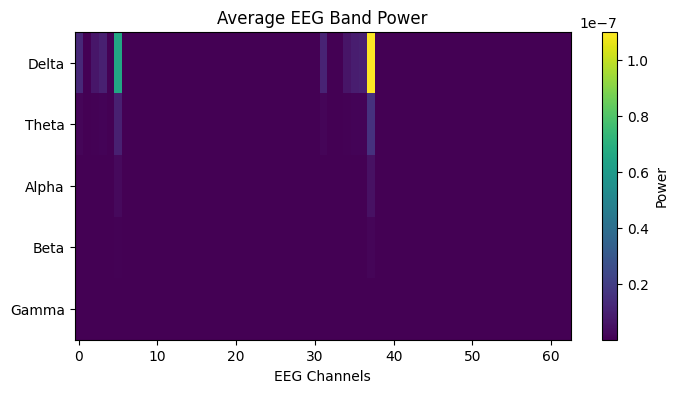

In [104]:
import matplotlib.pyplot as plt

band_names = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]
n_channels = X.shape[1] // len(band_names)

mean_features = X.mean(axis=0)
mean_features = mean_features.reshape(len(band_names), n_channels)

plt.figure(figsize=(8, 4))
plt.imshow(mean_features, aspect="auto", cmap="viridis")
plt.colorbar(label="Power")
plt.yticks(range(len(band_names)), band_names)
plt.xlabel("EEG Channels")
plt.title("Average EEG Band Power")
plt.show()


In [105]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.metrics import accuracy_score
from collections import Counter

loo = LeaveOneOut()

y_true, y_pred = [], []
skipped = 0

print("Class distribution:", Counter(y))

for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # skip fold if only one class in training
    if len(np.unique(y_train)) < 2:
        skipped += 1
        continue

    # pipeline: scaling + feature selection + SVM
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("select", SelectKBest(f_classif, k=min(10, X_train.shape[1]))),
        ("svm", SVC(kernel="linear", class_weight="balanced"))
    ])

    # hyperparameter tuning for C
    param_grid = {"svm__C": [0.01, 0.1, 1, 10, 100]}
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)

    pred = grid.predict(X_test)

    y_true.append(y_test[0])
    y_pred.append(pred[0])

print("Valid folds:", len(y_true))
print("Skipped folds:", skipped)

if y_true:
    print("LOSO Accuracy:", accuracy_score(y_true, y_pred))
else:
    print("⚠️ Not enough valid folds")

Class distribution: Counter({np.int64(0): 72, np.int64(1): 22})
Valid folds: 94
Skipped folds: 0
LOSO Accuracy: 0.7021276595744681


In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from collections import Counter
import numpy as np

loo = LeaveOneOut()
y_true, y_pred = [], []
skipped = 0

print("Class distribution:", Counter(y))

for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    if len(np.unique(y_train)) < 2:
        skipped += 1
        continue

    clf = Pipeline([
        ("scaler", StandardScaler()),
        ("select", SelectKBest(f_classif, k=min(10, X_train.shape[1]))),
        ("rf", RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42))
    ])

    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)

    y_true.append(y_test[0])
    y_pred.append(pred[0])

print("Valid folds:", len(y_true))
print("Skipped folds:", skipped)
print("LOSO Accuracy:", accuracy_score(y_true, y_pred))


Class distribution: Counter({np.int64(0): 72, np.int64(1): 22})
Valid folds: 94
Skipped folds: 0
LOSO Accuracy: 0.7127659574468085


In [ ]:
import matplotlib.pyplot as plt

band_names = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]
n_channels = X.shape[1] // len(band_names)

mean_features = X.mean(axis=0)
mean_features = mean_features.reshape(len(band_names), n_channels)

plt.figure(figsize=(8, 4))
plt.imshow(mean_features, aspect="auto", cmap="viridis")
plt.colorbar(label="Power")
plt.yticks(range(len(band_names)), band_names)
plt.xlabel("EEG Channels")
plt.title("Average EEG Band Power")
plt.show()
